In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read Train and Test Data
train = pd.read_csv("loan_train.csv")
test = pd.read_csv("loan_test.csv")

In [3]:
#Copy of original data
train_original = train.copy()
test_original = test.copy()

In [4]:
#Understanding the Data
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
#Print the data types
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Shape of the dataset
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
#Target Variable
#train["Loan_Status"].size
train["Loan_Status"].count()

614

In [10]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number 
train["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

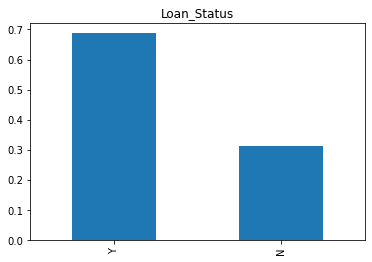

In [12]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

In [13]:
#Independent Variable (Categorical)
#Analysis on "Gender" variable :
train["Gender"].count()

601

In [14]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
train['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

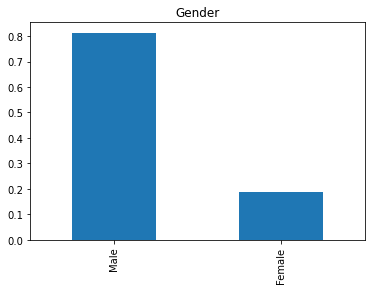

In [16]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

In [17]:
#Analysis on "Married" variable :
train["Married"].count()

611

In [18]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [19]:
train['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

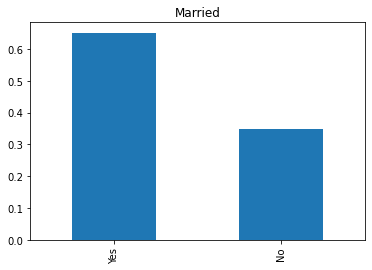

In [20]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

In [21]:
#Analysis on "Self_Employed" variable :
train["Self_Employed"].count()

582

In [22]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [23]:
train['Self_Employed'].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

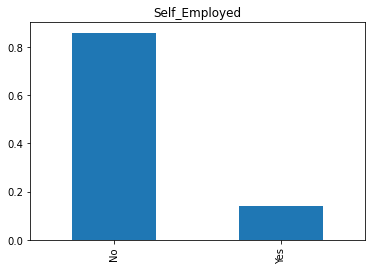

In [24]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

In [25]:
#Analysis on "Credit_History" variable :
train["Credit_History"].count()

564

In [26]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
train['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

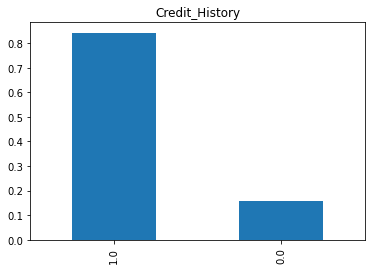

In [28]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

In [29]:
#Independent Variable (Ordinal)
#Analysis on "Dependents" variable :
train['Dependents'].count()

599

In [30]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [31]:
train['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

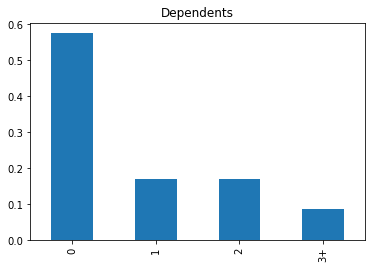

In [32]:
train['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

In [33]:
#Analysis on "Education" variable :
train["Education"].count()

614

In [34]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [35]:
train["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

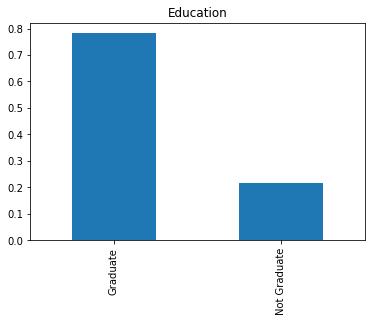

In [36]:
train["Education"].value_counts(normalize=True).plot.bar(title = "Education")

In [37]:
#Analysis on "Property_Area" variable :
train["Property_Area"].count()

614

In [38]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [39]:
train["Property_Area"].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

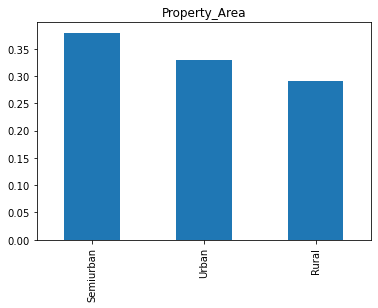

In [40]:
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

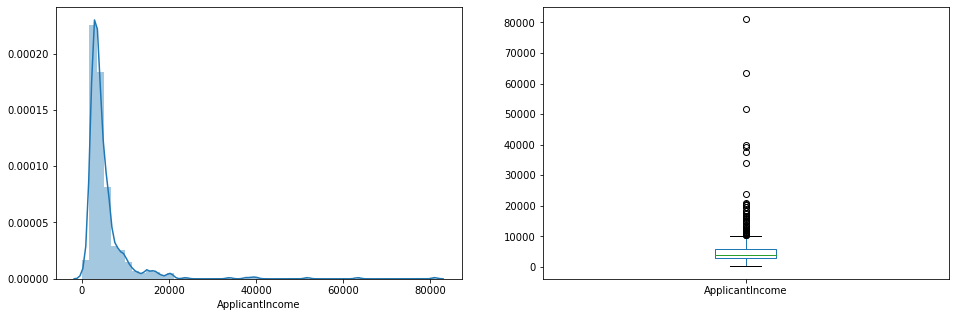

In [41]:
#Independent Variable (Numerical)
#"ApplicantIncome" distribution :
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"]);

plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

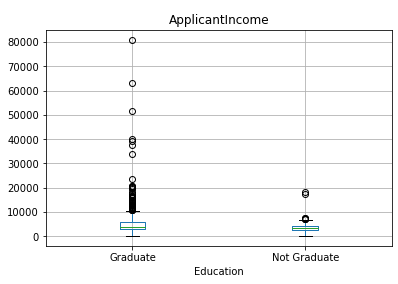

In [42]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

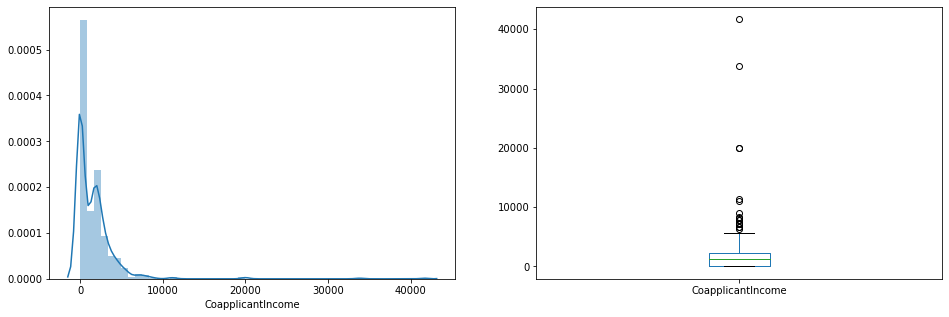

In [43]:
#Let’s look at the "CoapplicantIncome" distribution:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"]);

plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

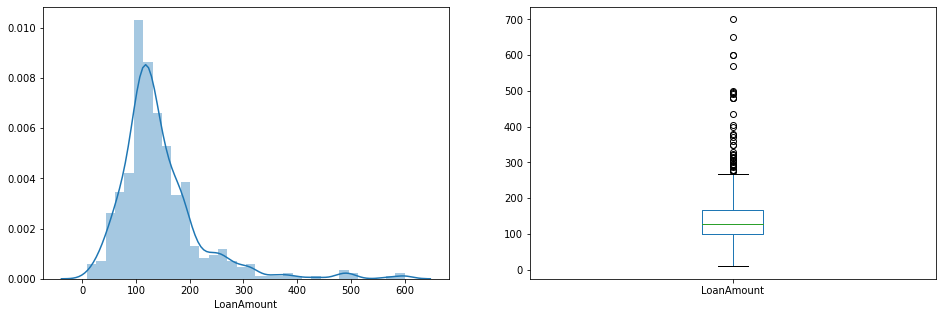

In [44]:
#Let’s look at the distribution of "LoanAmount" variable 
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

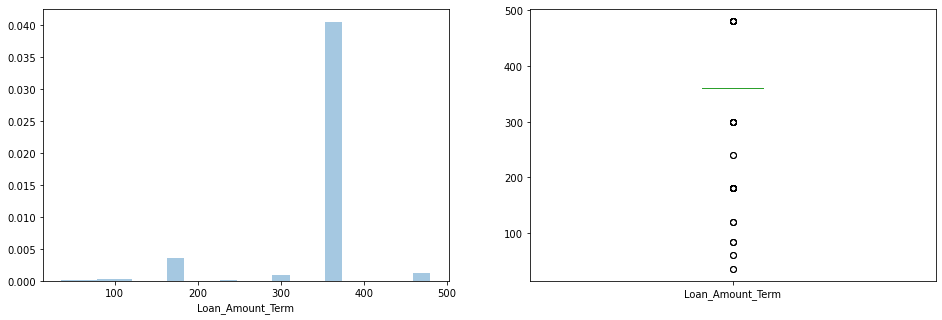

In [45]:
#distribution of "LoanAmountTerm" variable :
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan_Amount_Term"]);

plt.subplot(122)
df["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


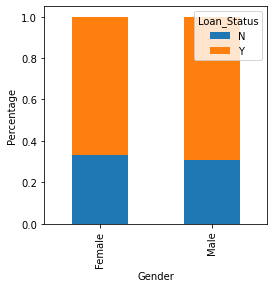

In [46]:
#Bivariate Analysis
#Categorical Independent Variable vs Target Variable
#Relation between "Loan_Status" and "Gender"
print(pd.crosstab(train["Gender"],train["Loan_Status"]))
Gender = pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


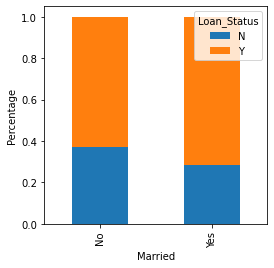

In [47]:
#Relation between "Loan_Status" and "Married"
print(pd.crosstab(train["Married"],train["Loan_Status"]))
Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


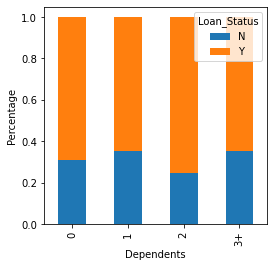

In [48]:
#Relation between "Loan_Status" and "Dependents"
print(pd.crosstab(train['Dependents'],train["Loan_Status"]))
Dependents = pd.crosstab(train['Dependents'],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


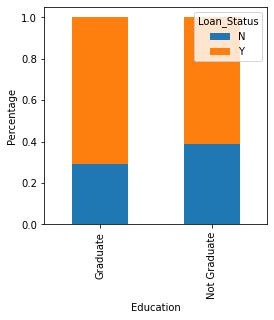

In [49]:
#Relation between "Loan_Status" and "Education"
print(pd.crosstab(train["Education"],train["Loan_Status"]))
Education = pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


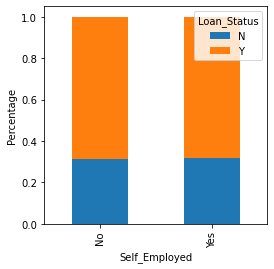

In [50]:
#Relation between "Loan_Status" and "Self_Employed"
print(pd.crosstab(train["Self_Employed"],train["Loan_Status"]))
SelfEmployed = pd.crosstab(train["Self_Employed"],train["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


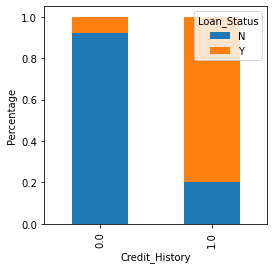

In [51]:
#Relation between "Loan_Status" and "Credit_History"
print(pd.crosstab(train["Credit_History"],train["Loan_Status"]))
CreditHistory = pd.crosstab(train["Credit_History"],train["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


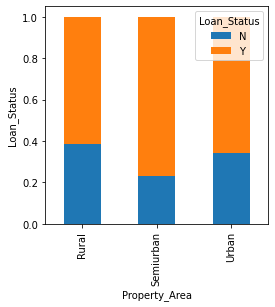

In [52]:
#Relation between "Loan_Status" and "Property_Area"
print(pd.crosstab(train["Property_Area"],train["Loan_Status"]))
PropertyArea = pd.crosstab(train["Property_Area"],train["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

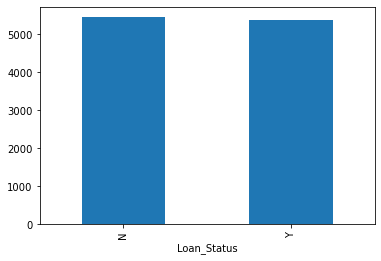

In [53]:
#Numerical Independent Variable vs Target Variable
#Relation between "Loan_Status" and "Income"
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

In [54]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


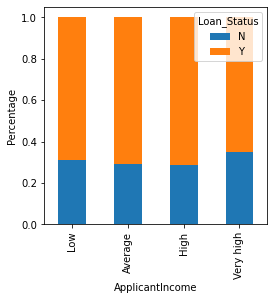

In [55]:
print(pd.crosstab(train["Income_bin"],train["Loan_Status"]))
Income_bin = pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [56]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
train['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   15
Average                46  123
High                   24   53


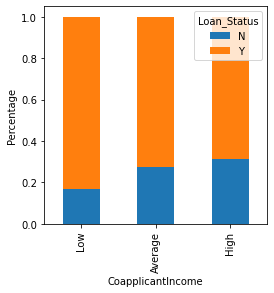

In [57]:
print(pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(train["CoapplicantIncome_bin"],train["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()


In [58]:
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [59]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train["TotalIncome_bin"]=pd.cut(train["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


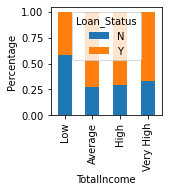

In [60]:
print(pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"]))
TotalIncome = pd.crosstab(train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

In [61]:
#Relation between "Loan_Status" and "Loan Amount"
bins = [0,100,200,700]
group=['Low','Average','High']
train["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status      N    Y
LoanAmount_bin         
Low             38   86
Average         83  207
High            27   39


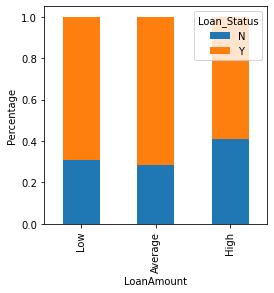

In [62]:
print(pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"]))
LoanAmount=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

In [63]:
#Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable
train=train.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [64]:
#train['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
#test['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

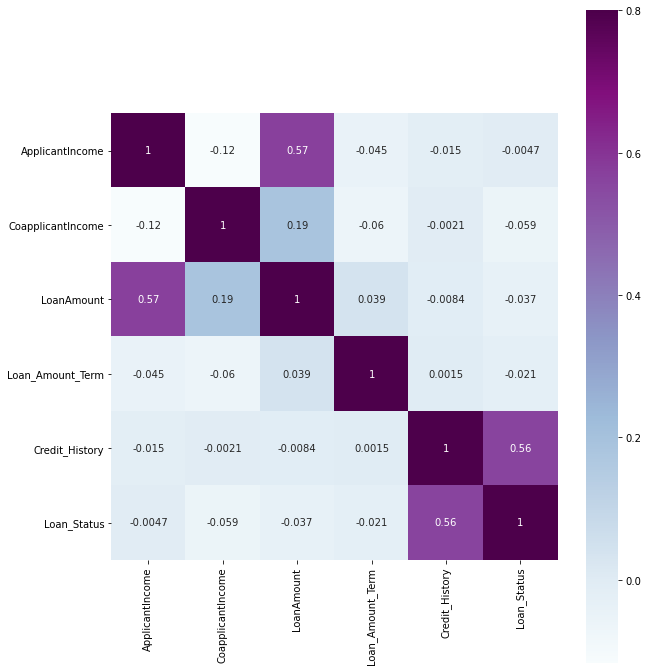

In [65]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);

In [66]:
#Missing Value and Outlier Treatment
#Missing value imputation
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train['Dependents'].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [68]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [69]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [70]:
train["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [71]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [72]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [74]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test['Dependents'].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

In [75]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

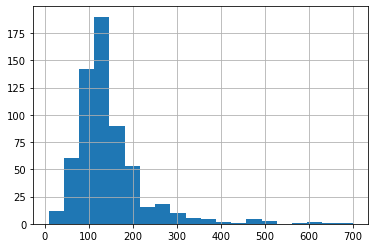

In [76]:
train['LoanAmount'].hist(bins=20)

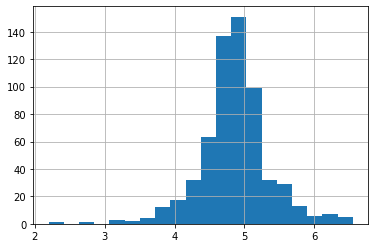

In [77]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

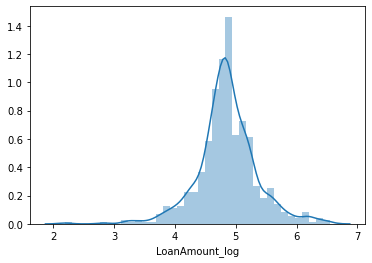

In [78]:
sns.distplot(train["LoanAmount_log"])

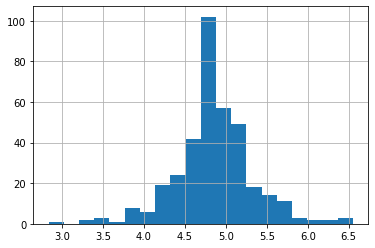

In [79]:
test["LoanAmount_log"]=np.log(train["LoanAmount"])
test['LoanAmount_log'].hist(bins=20)

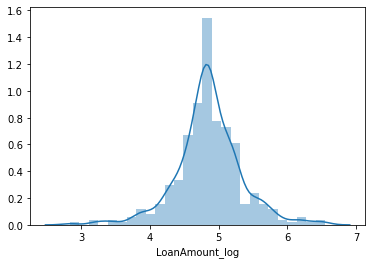

In [80]:
sns.distplot(test["LoanAmount_log"])

In [81]:
#Feature Engineering
train["TotalIncome"]=train["ApplicantIncome"]+train["CoapplicantIncome"]

In [82]:
train[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


In [83]:
test["TotalIncome"]=test["ApplicantIncome"]+test["CoapplicantIncome"]

In [84]:
test[["TotalIncome"]].head()

,TotalIncome
0,5720
1,4576
2,6800
3,4886
4,3276


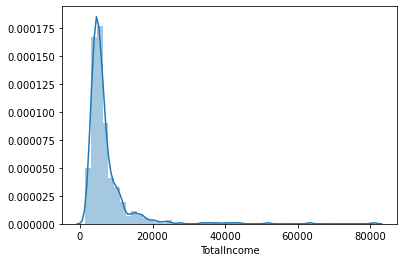

In [85]:
sns.distplot(train["TotalIncome"])

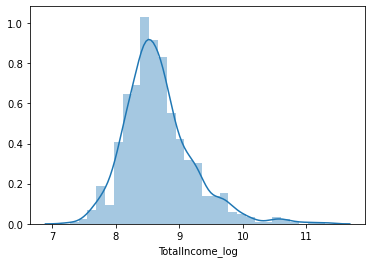

In [86]:
train["TotalIncome_log"]=np.log(train["TotalIncome"])
sns.distplot(train["TotalIncome_log"])

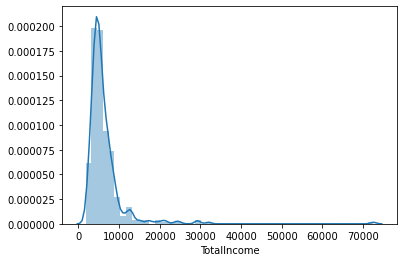

In [87]:
sns.distplot(test["TotalIncome"])

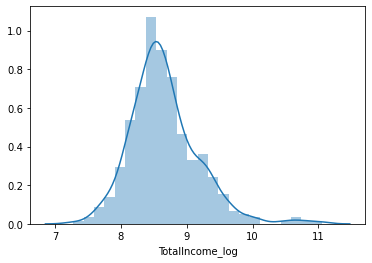

In [88]:
test["TotalIncome_log"] = np.log(train["TotalIncome"])
sns.distplot(test["TotalIncome_log"])

In [89]:
train["EMI"]=train["LoanAmount"]/train["Loan_Amount_Term"]
test["EMI"]=test["LoanAmount"]/test["Loan_Amount_Term"]

In [90]:
train[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


In [91]:
test[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


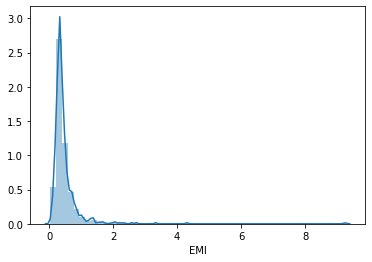

In [92]:
sns.distplot(train["EMI"])

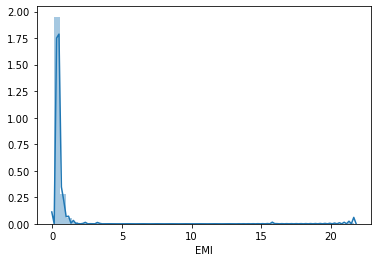

In [93]:
sns.distplot(test["EMI"])

In [94]:
train["Balance_Income"] = train["TotalIncome"]-train["EMI"]*1000 # To make the units equal we multiply with 1000
test["Balance_Income"] = test["TotalIncome"]-test["EMI"]

In [95]:
train[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


In [96]:
test[["Balance_Income"]].head()

,Balance_Income
0,5719.694444
1,4575.650000
2,6799.422222
3,4885.722222
4,3275.783333


In [97]:
train=train.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [98]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [99]:
test = test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [100]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,LP001022,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,LP001031,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222
3,LP001035,Male,Yes,2,Graduate,No,1.0,Urban,4.787492,4886,8.505323,0.277778,4885.722222
4,LP001051,Male,No,0,Not Graduate,No,1.0,Urban,4.948760,3276,8.699515,0.216667,3275.783333


In [101]:
#Model Building :
#Drop "Loan_ID"
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [102]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667


In [103]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,4.852030,5720,8.674026,0.305556,5719.694444
1,Male,Yes,1,Graduate,No,1.0,Urban,4.852030,4576,8.714568,0.350000,4575.650000
2,Male,Yes,2,Graduate,No,1.0,Urban,4.189655,6800,8.006368,0.577778,6799.422222


In [104]:
#droping the target variable "Loan_Status"
X=train.drop("Loan_Status",1)

In [105]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,6091.0,8.714568,0.355556,5735.444444


In [106]:
y=train[["Loan_Status"]]

In [107]:
y.head(2)

,Loan_Status
0,1
1,0


In [108]:
X = pd.get_dummies(X)

In [109]:
X.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1


In [110]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [111]:
train.head(3)

,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,1.0,0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,...,0,1,0,1,0,1,0,1,0,0
2,1.0,1,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,...,1,0,0,1,0,0,1,0,0,1


In [112]:
test.head(3)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5720,8.674026,0.305556,5719.694444,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,4576,8.714568,0.350000,4575.650000,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,1.0,4.189655,6800,8.006368,0.577778,6799.422222,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

In [115]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [116]:
logistic_model = LogisticRegression(random_state=1)

In [117]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [118]:
pred_cv_logistic=logistic_model.predict(x_cv)

In [119]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [120]:
score_logistic

75.67567567567568

In [121]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [122]:
tree_model = DecisionTreeClassifier(random_state=1)

In [123]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [124]:
pred_cv_tree=tree_model.predict(x_cv)

In [125]:
score_tree =accuracy_score(pred_cv_tree,y_cv)*100 

In [126]:
score_tree

71.35135135135135

In [127]:
pred_test_tree = tree_model.predict(test)

In [128]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [129]:
bayes_model = GaussianNB()

In [130]:
bayes_model.fit(x_train,y_train)

GaussianNB()

In [131]:
pred_cv_bayes=bayes_model.predict(x_cv)

In [132]:
score_bayes =accuracy_score(pred_cv_bayes,y_cv)*100 

In [133]:
score_bayes

78.37837837837837

In [134]:
#Import SVM model
from sklearn import svm

In [135]:
svm_model = svm.SVC()

In [136]:
svm_model.fit(x_train,y_train)

SVC()

In [137]:
pred_cv_svm=svm_model.predict(x_cv)

In [138]:
score_svm =accuracy_score(pred_cv_svm,y_cv)*100 

In [139]:
score_svm

67.02702702702703

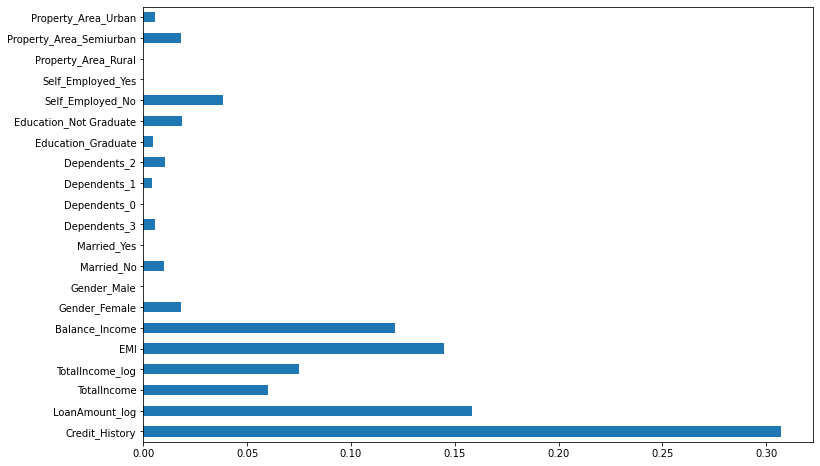

In [140]:
#Find the important feature
importances = pd.Series(tree_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))